In [60]:
%matplotlib notebook

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
import seaborn
import matplotlib.cm as cm

# IMPORT CSV

In [62]:
satisfaction_data = "data/Satisfaction.csv"

In [63]:
sat_data_df = pd.read_csv(satisfaction_data)
sat_data_df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [64]:
sat_data_df.dtypes

id                                     int64
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure 

In [65]:
sat_data_df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# CLEAN CSV FILE FOR RELEVANT DATA

In [66]:
clean_sat_data_df = sat_data_df[["id", "satisfaction_v2", "Gender", "Customer Type", "Age", "Type of Travel", "Class", "Flight Distance", "Seat comfort", "Food and drink"]]
clean_sat_data_df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0


In [67]:
seat_comfort = len(clean_sat_data_df["Seat comfort"].unique())
seat_comfort

6

In [68]:
class_type = len(clean_sat_data_df["Class"].unique())
class_type

3

In [69]:
flight_dist = clean_sat_data_df["Flight Distance"].max()
flight_dist

6951

In [70]:
gender = len(clean_sat_data_df["Gender"].unique())
gender

2

In [101]:
satisfied = len(clean_sat_data_df["satisfaction_v2"].unique())
satisfied

2

In [71]:
final_df = clean_sat_data_df.dropna()

In [72]:
final_df.count()

id                 129880
satisfaction_v2    129880
Gender             129880
Customer Type      129880
Age                129880
Type of Travel     129880
Class              129880
Flight Distance    129880
Seat comfort       129880
Food and drink     129880
dtype: int64

In [73]:
final_df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0


In [74]:
final_df.loc[:, "Seat comfort"] = final_df["Seat comfort"].astype("object")
final_df.dtypes

id                  int64
satisfaction_v2    object
Gender             object
Customer Type      object
Age                 int64
Type of Travel     object
Class              object
Flight Distance     int64
Seat comfort       object
Food and drink      int64
dtype: object

In [75]:
final_df.rename(columns={'satisfaction_v2': 'satisfied', 'Gender': 'gender', 'Customer Type': 'customer_type', 'Age': 'age', 'Type of Travel': 'travel_type', 'Class': 'class', 'Flight Distance': 'distance', 'Seat comfort': 'comfort', 'Food and drink': 'food_drink'}, inplace=True)
final_df.head()

,id,satisfied,gender,customer_type,age,travel_type,class,distance,comfort,food_drink
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0


# CREATE BINS FOR FLIGHT DISTANCE CATEGORIES

In [76]:
bins = [0, 1250, 2500, 3500, 4500, 6500, 7000]

# Create the names for the four bins
group_names = ["short", "short_middle", "middle", "middle_long", "long", "super_long"]

In [77]:
final_df["trip_type"] = pd.cut(final_df.loc[:, "distance"], bins, labels=group_names)
final_df.head()

,id,satisfied,gender,customer_type,age,travel_type,class,distance,comfort,food_drink,trip_type
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,short
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,short_middle
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,short_middle
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,short
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,short


In [78]:
final_df.dtypes

id                  int64
satisfied          object
gender             object
customer_type      object
age                 int64
travel_type        object
class              object
distance            int64
comfort            object
food_drink          int64
trip_type        category
dtype: object

In [79]:
final_df.loc[:, "trip_type"] = final_df["trip_type"].astype("object")

final_df.loc[:, "comfort"] = final_df["comfort"].astype("int64")

final_df.dtypes

id                int64
satisfied        object
gender           object
customer_type    object
age               int64
travel_type      object
class            object
distance          int64
comfort           int64
food_drink        int64
trip_type        object
dtype: object

In [80]:
reduced_final_df = final_df[["distance", "comfort", "trip_type"]]
reduced_final_df.head()

,distance,comfort,trip_type
0,265,0,short
1,2464,0,short_middle
2,2138,0,short_middle
3,623,0,short
4,354,0,short


In [81]:
star_df = reduced_final_df[["comfort", "trip_type"]]
star_df

,comfort,trip_type
0,0,short
1,0,short_middle
2,0,short_middle
3,0,short
4,0,short
...,...,...
129875,5,short_middle
129876,2,short_middle
129877,3,short_middle
129878,3,short_middle


In [82]:
select_trip = ['short']
select_short_df = star_df[star_df['trip_type'].isin(select_trip)]

select_trip = ['short_middle']
select_short_middle_df = star_df[star_df['trip_type'].isin(select_trip)]

select_trip = ['middle']
select_middle_df = star_df[star_df['trip_type'].isin(select_trip)]

select_trip = ['middle_long']
select_middle_long_df = star_df[star_df['trip_type'].isin(select_trip)]

select_trip = ['long']
select_long_df = star_df[star_df['trip_type'].isin(select_trip)]

select_trip = ['super_long']
select_super_long_df = star_df[star_df['trip_type'].isin(select_trip)]


select_long_df

,comfort,trip_type
145,0,long
1160,1,long
1161,1,long
1162,1,long
1664,1,long
...,...,...
129402,1,long
129420,2,long
129528,3,long
129580,1,long


In [83]:
select_super_long_df['comfort'].value_counts()

2    11
4     8
3     7
1     7
5     4
0     3
Name: comfort, dtype: int64

In [84]:
reduced_final_df['trip_type'].value_counts()

short_middle    66538
short           29111
middle          22863
middle_long      9303
long             2025
super_long         40
Name: trip_type, dtype: int64

In [85]:
short_df = reduced_final_df[reduced_final_df["trip_type"]=="short"]
short_middle_df = reduced_final_df[reduced_final_df["trip_type"]=="short_middle"]
middle_df = reduced_final_df[reduced_final_df["trip_type"]=="middle"]
middle_long_df = reduced_final_df[reduced_final_df["trip_type"]=="middle_long"]
long_df = reduced_final_df[reduced_final_df["trip_type"]=="long"]
super_long_df = reduced_final_df[reduced_final_df["trip_type"]=="super_long"]

short_df

,distance,comfort,trip_type
0,265,0,short
3,623,0,short
4,354,0,short
6,227,0,short
8,73,0,short
...,...,...,...
129767,1248,4,short
129768,977,4,short
129777,1110,0,short
129830,1191,3,short


In [86]:
star_group = short_df.groupby("trip_type")
star_group.mean()

,distance,comfort
trip_type,,
short,650.302978,2.951015


In [87]:
short_star = short_df.groupby("trip_type").count()
short_middle_star = short_middle_df.groupby("trip_type").count()
middle_star = middle_df.groupby("trip_type").count()
middle_long_star = middle_long_df.groupby("trip_type").count()
long_star = long_df.groupby("trip_type").count()
super_long_star = super_long_df.groupby("trip_type").count()

short_star

,distance,comfort
trip_type,,
short,29111,29111


In [88]:
short_mean = short_df.groupby("comfort").count()
short_middle_mean = short_middle_df.groupby("comfort").count()
middle_mean = middle_df.groupby("comfort").count()
middle_long_mean = middle_long_df.groupby("comfort").count()
long_mean = long_df.groupby("comfort").count()
super_long_mean = super_long_df.groupby("comfort").count()
short_mean

,distance,trip_type
comfort,,
0,1317,1317
1,4347,4347
2,5647,5647
3,5814,5814
4,7106,7106
5,4880,4880


In [89]:
six_by_six = pd.DataFrame({"short" : short_mean["distance"],
                           "short_middle" : short_middle_mean["distance"],
                           "middle": middle_mean["distance"],
                           "middle_long": middle_long_mean["distance"],
                           "long" : long_mean["distance"],
                           "super_long": super_long_mean["distance"]})
six_by_six.round(0)

,short,short_middle,middle,middle_long,long,super_long
comfort,,,,,,
0,1317,2251,831,352,43,3
1,4347,10516,4039,1646,394,7
2,5647,15278,5163,2158,469,11
3,5814,15473,5253,2135,501,7
4,7106,14543,4590,1786,365,8
5,4880,8477,2987,1226,253,4


<IPython.core.display.Javascript object>


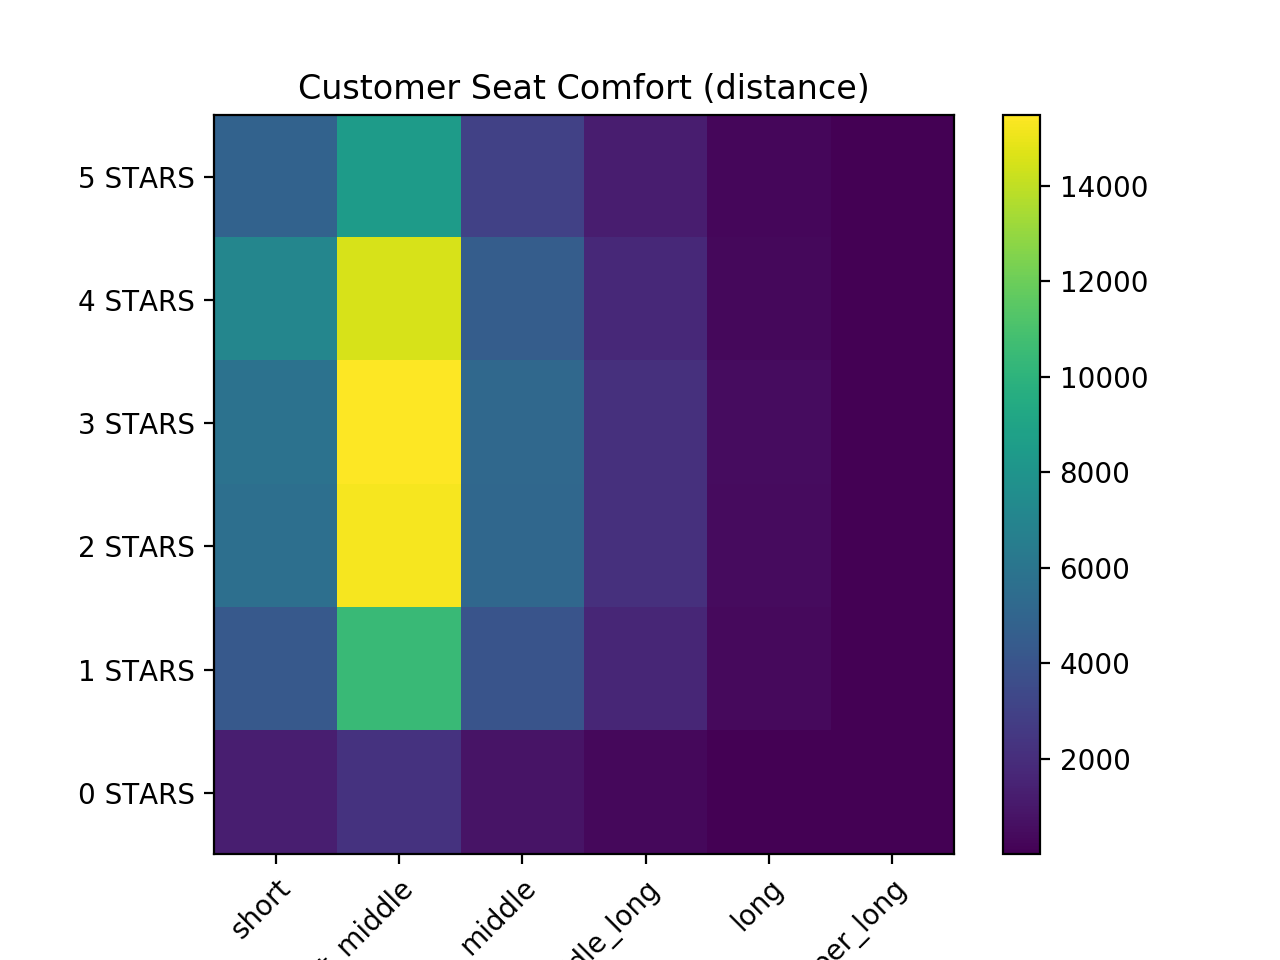

In [92]:
trips = ['short', 
         'short_middle', 
         'middle', 
         'middle_long', 
         'long', 
         'super_long']

comfort = ['5 STARS', 
           '4 STARS', 
           '3 STARS', 
           '2 STARS', 
           '1 STARS', 
           '0 STARS']

miles = ([
        [4880, 8477, 2987, 1226, 253, 4],
        [7106, 14543, 4590, 1786, 365, 8],
        [5814, 15473, 5253, 2135, 501, 7],
        [5647, 15278, 5163, 2158, 469, 11],
        [4347, 10516, 4039, 1646, 394, 7],
        [1317, 2251, 831, 352, 43, 3]
])

fig, ax = plt.subplots()
im = ax.imshow(miles)

# We want to show all ticks...
ax.set_xticks(np.arange(len(trips)))
ax.set_yticks(np.arange(len(comfort)))

# ... and label them with the respective list entries
ax.set_xticklabels(trips)
ax.set_yticklabels(comfort)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set colorbar

ax.set_title("Customer Seat Comfort (distance)")
plt.imshow(miles, cmap='viridis')

plt.colorbar()
plt.show()

# FIND COMFORT AVERAGES FOR EACH DISTANCE CATEGORY

In [93]:
comfort_group = final_df.groupby("trip_type")
comfort_group.mean()

,id,age,distance,comfort,food_drink
trip_type,,,,,
long,62623.561975,28.905679,4998.137778,2.745679,2.994568
middle,69382.629795,37.876525,2912.565061,2.773870,2.845602
middle_long,67300.710309,38.231323,3847.488552,2.756208,2.901430
short,62366.041840,48.796297,650.302978,2.951015,2.930439
short_middle,64291.579293,36.347756,1888.262166,2.826175,2.808846
super_long,47372.675000,42.900000,6721.500000,2.550000,2.475000


# BAR CHART PERCEIVED SEAT COMFORT V.  FLIGHT DISTANCE

In [94]:
trips = ["SHORT", "SHORT MIDDLE", "MIDDLE", "MIDDLE LONG", "LONG", "SUPER LONG"]
comfort_avg = [2.950870, 2.826145, 2.773926, 2.756287, 2.746276, 2.550000]
x_axis = trips

<IPython.core.display.Javascript object>


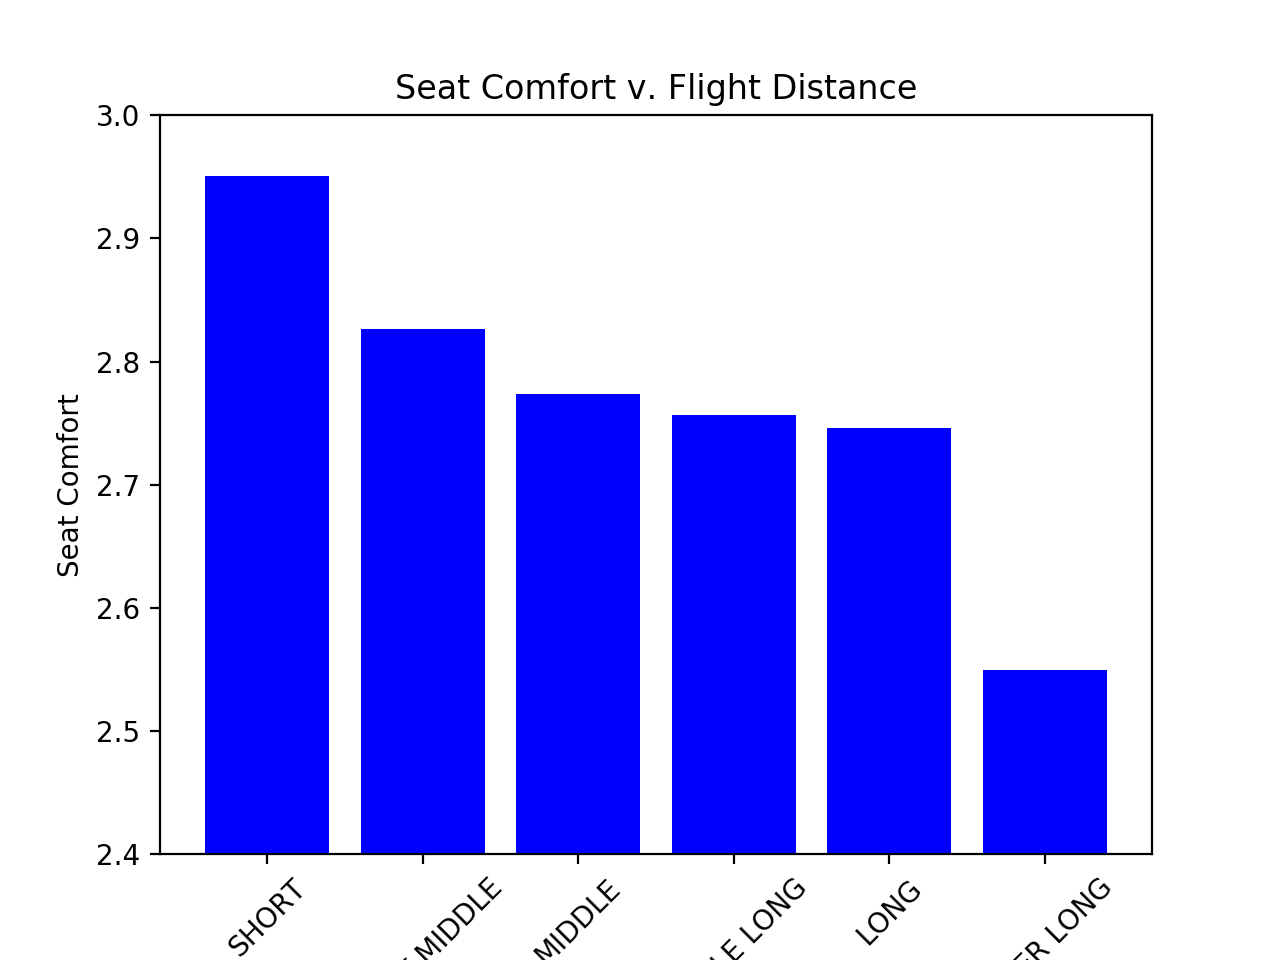

In [95]:
plt.bar(x_axis, comfort_avg, color="b", align="center")

plt.xticks(rotation=45)

plt.ylim(2.4, 3)

plt.title("Seat Comfort v. Flight Distance")
plt.xlabel("Trip Length")
plt.ylabel("Seat Comfort")

plt.show()

# AIRLINE CLIENT GENDER PIE CHART

In [96]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [63981, 65899]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

<IPython.core.display.Javascript object>


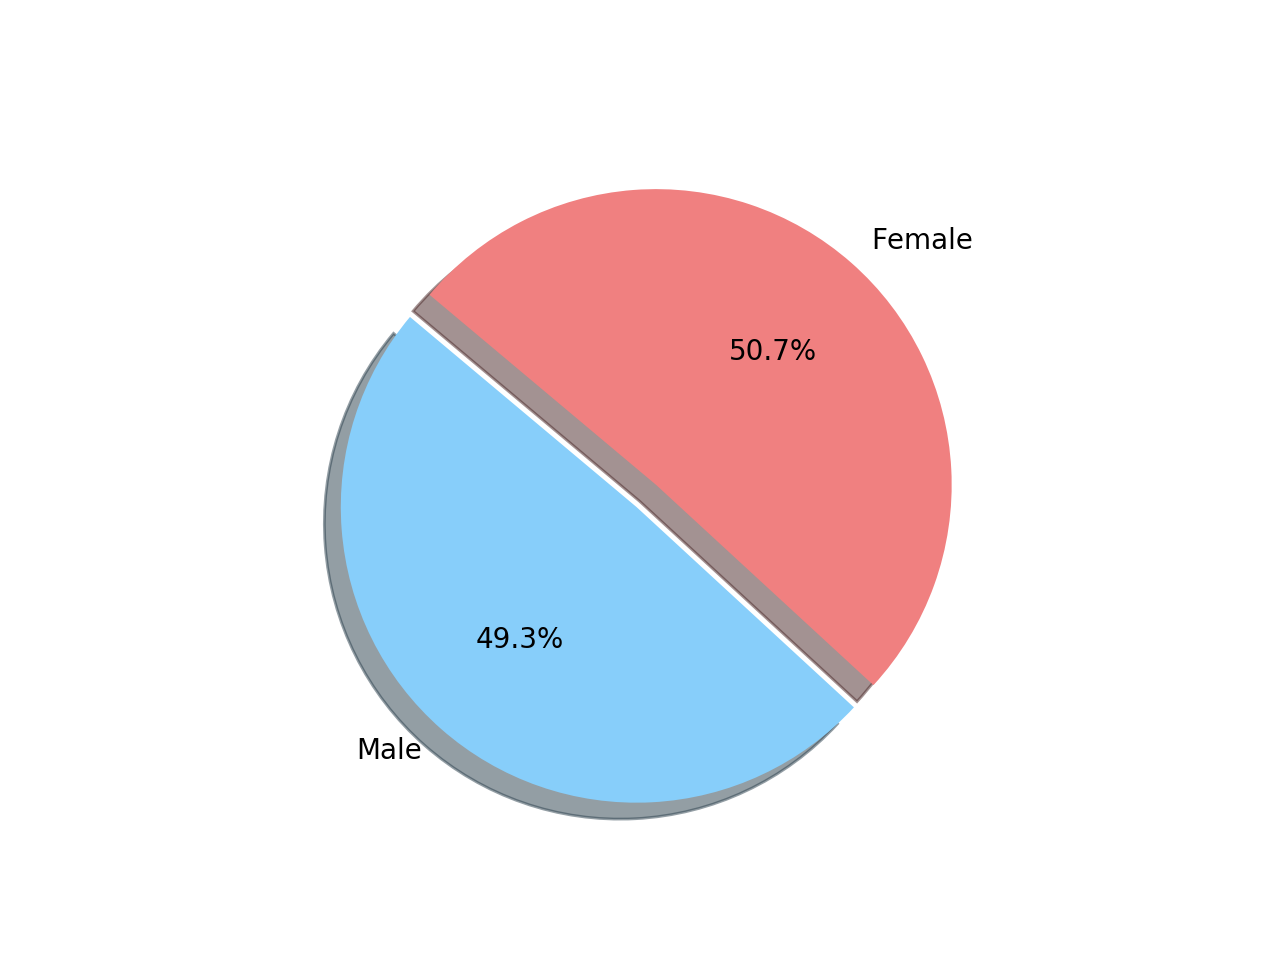

''

In [97]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

;

In [98]:
gender_compound_df = final_df[["gender", "satisfied", "customer_type", "class"]]
gender_compound_df

,gender,satisfied,customer_type,class
0,Female,satisfied,Loyal Customer,Eco
1,Male,satisfied,Loyal Customer,Business
2,Female,satisfied,Loyal Customer,Eco
3,Female,satisfied,Loyal Customer,Eco
4,Female,satisfied,Loyal Customer,Eco
...,...,...,...,...
129875,Female,satisfied,disloyal Customer,Eco
129876,Male,neutral or dissatisfied,disloyal Customer,Business
129877,Male,neutral or dissatisfied,disloyal Customer,Eco
129878,Male,neutral or dissatisfied,disloyal Customer,Eco


In [106]:
compound_df = gender_compound_df.groupby(["gender"]).agg({
    "satisfied":"value_counts",
    "customer_type":"value_counts",
    "class":"value_counts"})

compound_df

satisfied  customer_type    class
Female Business                       NaN            NaN  31263.0
       Eco                            NaN            NaN  29670.0
       Eco Plus                       NaN            NaN   4966.0
       Loyal Customer                 NaN        53056.0      NaN
       disloyal Customer              NaN        12843.0      NaN
       neutral or dissatisfied    22971.0            NaN      NaN
       satisfied                  42928.0            NaN      NaN
Male   Business                       NaN            NaN  30897.0
       Eco                            NaN            NaN  28639.0
       Eco Plus                       NaN            NaN   4445.0
       Loyal Customer                 NaN        53044.0      NaN
       disloyal Customer              NaN        10937.0      NaN
       neutral or dissatisfied    35822.0            NaN      NaN
       satisfied                  28159.0            NaN      NaN

<IPython.core.display.Javascript object>


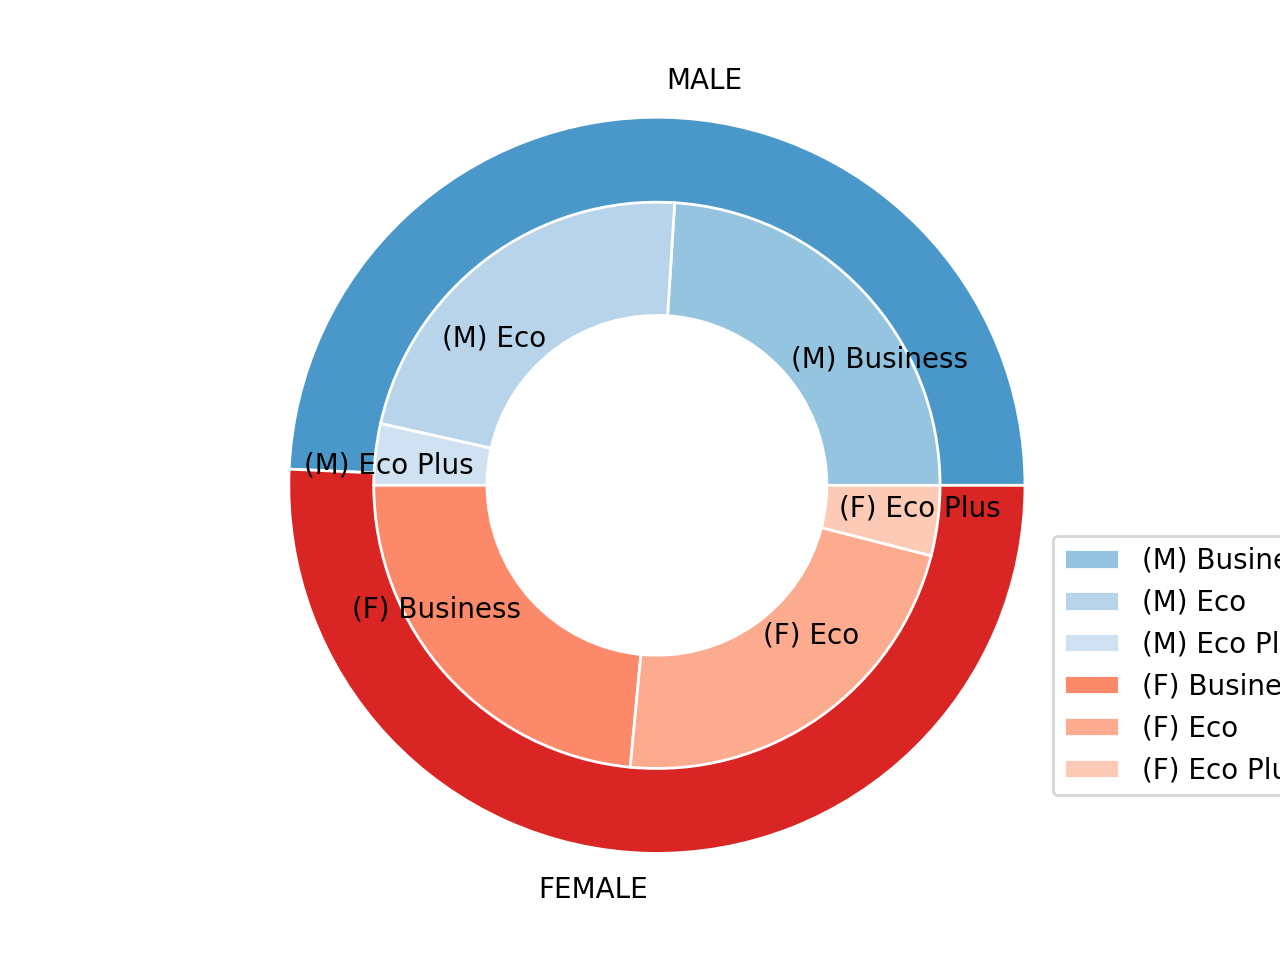

In [133]:
# Make data: I have 3 groups and 7 subgroups
group_names=['MALE', 'FEMALE']
group_size=[49.3, 50.7]
subgroup_names=['(M) Business', '(M) Eco', '(M) Eco Plus', '(F) Business', '(F) Eco', '(F) Eco Plus']
subgroup_size=[48, 45, 7, 47, 45, 8]

# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.7)] )
plt.setp(mypie, width=0.65, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.65, colors=[a(0.4), a(0.3), 
a(0.2), b(0.4), b(0.3), b(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
ax.axis('equal')
plt.margins(0,0)

plt.legend(loc=(1, 1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[2:], subgroup_names, loc=(0.9, 0.08))
plt.show()

# CATEGORICAL HEATMAP FLIGHT DISTANCE V. TO CUSTOMER AGE

In [122]:
# Generate some test data
x = final_df['distance']
y = final_df['age']

sns.jointplot(x=x, y=y, kind='hex')

plt.title("Heatmap of Age vs. Distance traveled")

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
def data_coord2view_coord(p, vlen, pmin, pmax):
    dp = pmax - pmin
    dv = (p - pmin) / dp * vlen
    return dv

def nearest_neighbours(xs, ys, reso, n_neighbours):
    im = np.zeros([reso, reso])
    extent = [np.min(xs), np.max(xs), np.min(ys), np.max(ys)]

    xv = data_coord2view_coord(xs, reso, extent[0], extent[1])
    yv = data_coord2view_coord(ys, reso, extent[2], extent[3])
    for x in range(reso):
        for y in range(reso):
            xp = (xv - x)
            yp = (yv - y)

            d = np.sqrt(xp**2 + yp**2)

            im[y][x] = 1 / np.sum(d[np.argpartition(d.ravel(), n_neighbours)[:n_neighbours]])

    return im, extent

n = 129880
xs = final_df['distance']
ys = final_df['age']
resolution = 250

fig, axes = plt.subplots(7000, 90)

for ax, neighbours in zip(axes.flatten(), [64]):
    if neighbours == 64:
        ax.plot(xs, ys, 'k.', markersize=2)
        ax.set_aspect('equal')
        ax.set_title("Scatter Plot")
    else:
        im, extent = nearest_neighbours(xs, ys, resolution, neighbours)
        ax.imshow(im, origin='lower', extent=extent, cmap=cm.jet)
        ax.set_title("Smoothing over %d neighbours" % neighbours)
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])
plt.show()

<IPython.core.display.Javascript object>

# CATEGORICAL HEATMAP SEAT COMFORT

In [ ]:
zero_df = drop_na_df[drop_na_df['Seat comfort']=="0"]
one_df = drop_na_df[drop_na_df['Seat comfort']=="1"]
two_df = drop_na_df[drop_na_df['Seat comfort']=="2"]
three_df = drop_na_df[drop_na_df['Seat comfort']=="3"]
four_df = drop_na_df[drop_na_df['Seat comfort']=="4"]
five_df = drop_na_df[drop_na_df['Seat comfort']=="5"]
zero_df.head()

In [ ]:
zero_mean = zero_df.groupby("trips").mean()
one_mean = one_df.groupby("trips").mean()
two_mean = two_df.groupby("trips").mean()
three_mean = three_df.groupby("trips").mean()
four_mean = four_df.groupby("trips").mean()
five_mean = five_df.groupby("trips").mean()
zero_mean

In [ ]:
short_df = drop_na_df[drop_na_df["trips"]=="SHORT"]
short_middle_df = drop_na_df[drop_na_df["trips"]=="SHORT MIDDLE"]
middle_df = drop_na_df[drop_na_df["trips"]=="MIDDLE"]
middle_long_df = drop_na_df[drop_na_df["trips"]=="MIDDLE LONG"]
long_df = drop_na_df[drop_na_df["trips"]=="LONG"]
super_long_df = drop_na_df[drop_na_df["trips"]=="SUPER LONG"]

In [ ]:
six_by_six = pd.DataFrame({"0" : zero_mean["distance"],
                           "1" : one_mean["distance"],
                           "2": two_mean["distance"],
                           "3": three_mean["distance"],
                           "4" : four_mean["distance"],
                           "5": five_mean["distance"]})
six_by_six